In [14]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.dates as mdates  # Import the date formatter tool




In [7]:
# Load the dataset
# Replace 'your_data.csv' with your actual file name
df = pd.read_csv('C:\\Users\\arjun\\REVIVE\\Research\\CATE_2026\\EnthalpyTest4_2B_IECC_TMY_DCint_7000_2925_BRHourlyCool.csv')

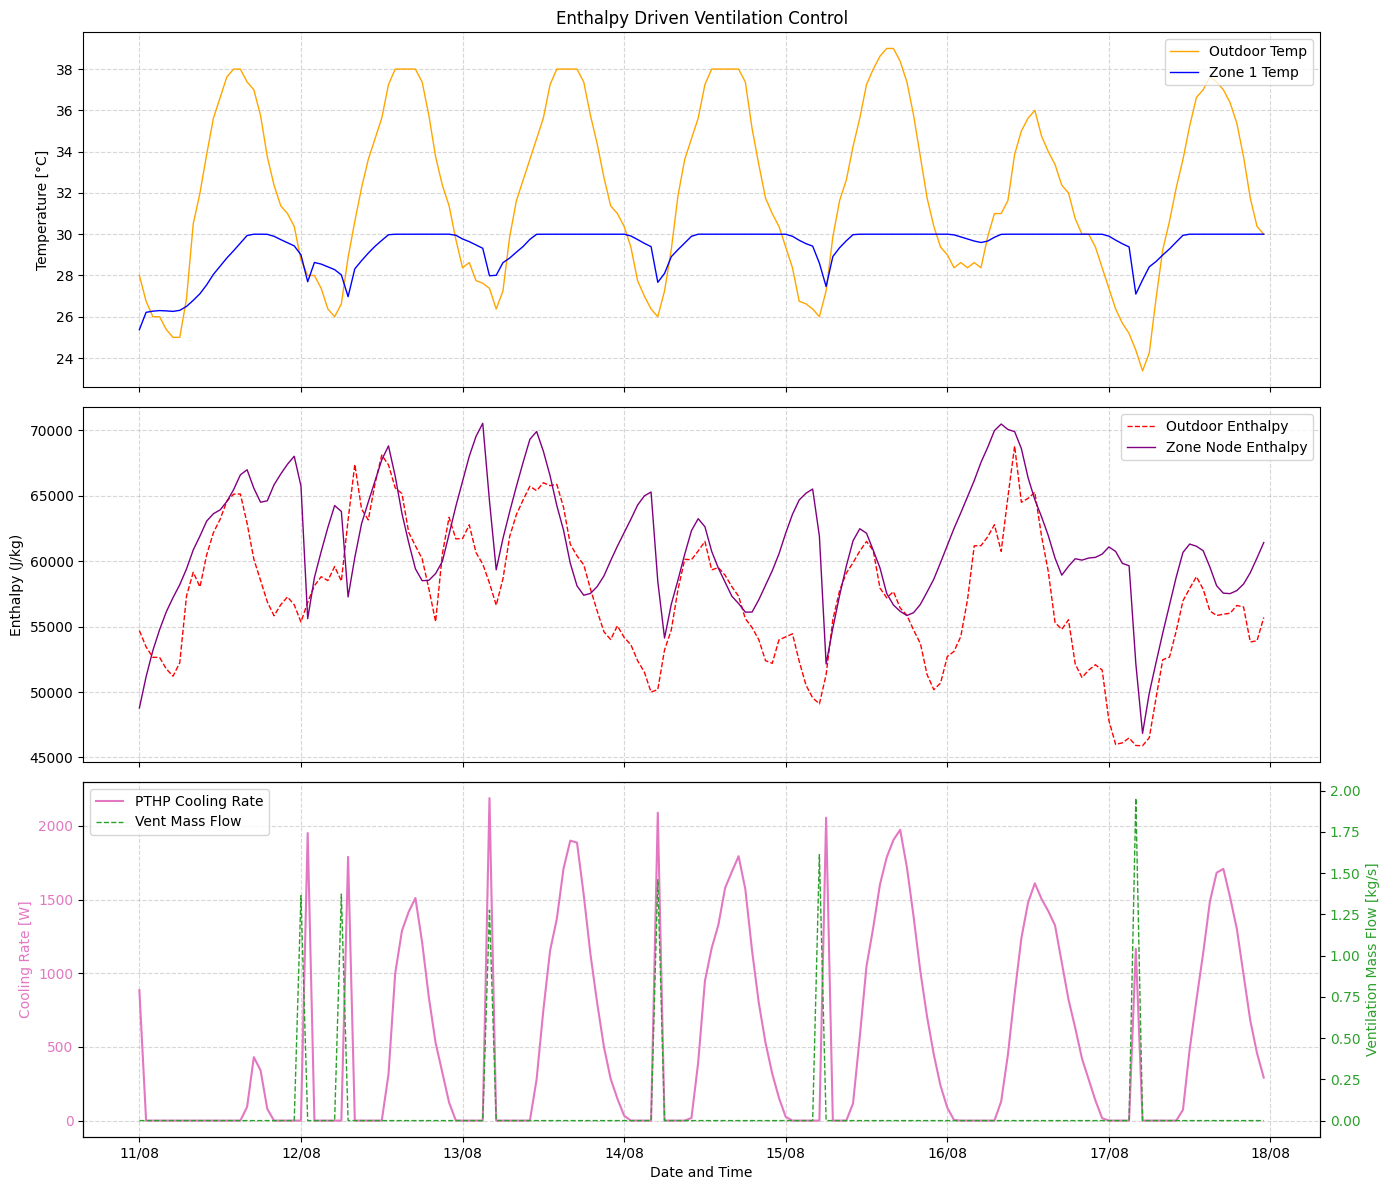

In [18]:
# 2. Convert DateTime to a proper format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# 2. Create the subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# --- Subplot 1: Temperature ---
ax1.plot(df['DateTime'], df['Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)'], 
         label='Outdoor Temp', color='orange', linewidth=1)
ax1.plot(df['DateTime'], df['ZONE1:Zone Air Temperature [C](Hourly)'], 
         label='Zone 1 Temp', color='blue', linewidth=1)

ax1.set_ylabel('Temperature [°C]')
ax1.set_title('Enthalpy Driven Ventilation Control') # Main Title on top
ax1.legend(loc='upper right')
ax1.grid(True, linestyle='--', alpha=0.5)


# --- Subplot 2: Enthalpy (Energy content of the air) ---
ax2.plot(df['DateTime'], df['Environment:Site Outdoor Air Enthalpy [J/kg](Hourly)'], 
         label='Outdoor Enthalpy', color='red', linewidth=1, linestyle='--')
ax2.plot(df['DateTime'], df['ZONE1_ZONE_AIR_NODE:System Node Enthalpy [J/kg](Hourly)'], 
         label='Zone Node Enthalpy', color='purple', linewidth=1)

ax2.set_ylabel('Enthalpy (J/kg)')
# ax2.set_title('') # Removed redundant title to save space
ax2.legend(loc='upper right')
ax2.grid(True, linestyle='--', alpha=0.5)


# --- Subplot 3: Cooling Rate vs Ventilation (Dual Axis) ---
# Primary Axis (Left): Cooling Rate in Watts
color = 'tab:pink'
ax3.set_xlabel('Date and Time')
ax3.set_ylabel('Cooling Rate [W]', color=color)
line1 = ax3.plot(df['DateTime'], df['ZONE1_PTHP:Zone Packaged Terminal Heat Pump Total Cooling Rate [W](Hourly)'], 
         label='PTHP Cooling Rate', color=color, linewidth=1.5)
ax3.tick_params(axis='y', labelcolor=color)
ax3.grid(True, linestyle='--', alpha=0.5)
date_format = mdates.DateFormatter('%d/%m')

# Apply it to the x-axis (since sharex=True, applying to ax3 handles it for all)
ax3.xaxis.set_major_formatter(date_format)
# Secondary Axis (Right): Mass Flow in kg/s
ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax4.set_ylabel('Ventilation Mass Flow [kg/s]', color=color)  
line2 = ax4.plot(df['DateTime'], df['ZONE1:Zone Ventilation Mass Flow Rate [kg/s](Hourly)'], 
         label='Vent Mass Flow', color=color, linewidth=1, linestyle='--')
ax4.tick_params(axis='y', labelcolor=color)

# Combine legends for the dual axis
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax3.legend(lines, labels, loc='upper left')


# 4. Final Formatting
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()